/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_44760/3792293553.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


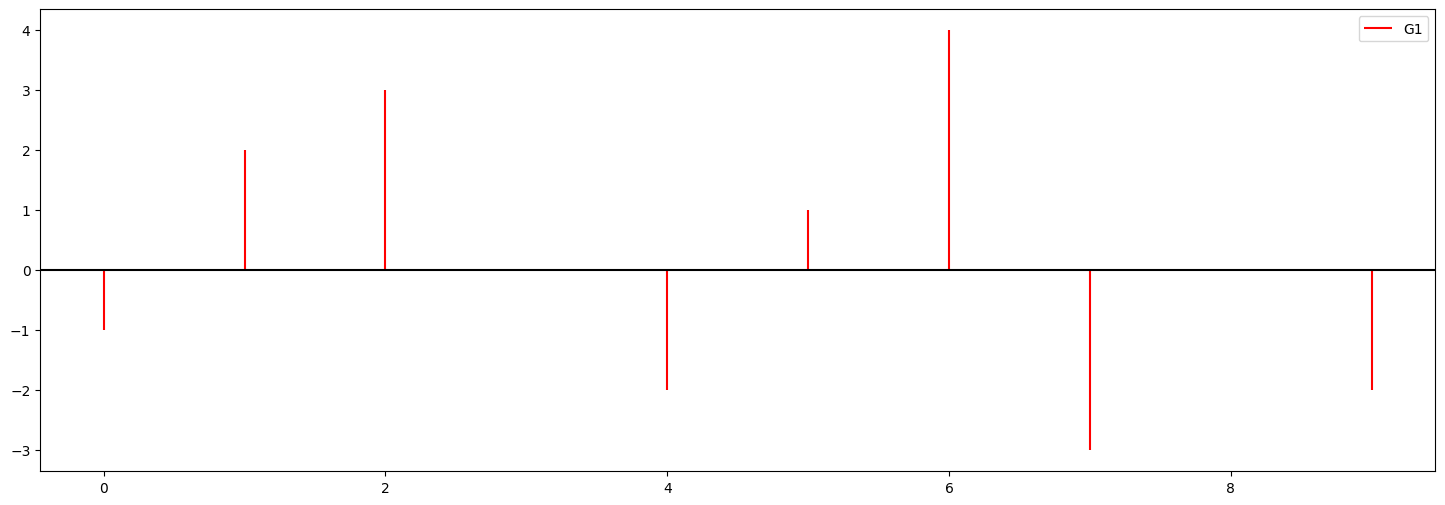

In [2]:
import numpy as np
import matplotlib.pyplot as plt
L = 10
y = np.array([-1, 2, 3, 0, -2, 1, 4, -3, 0, -2])
ns = np.arange(L)

fig = plt.figure(figsize=(18, 6))
plt.vlines(ns, ymin=0, ymax=y, colors='r', linestyles='solid', label='G1')
plt.axhline(y=0, color='k')
plt.legend()
fig.show()

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_17487/145427482.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


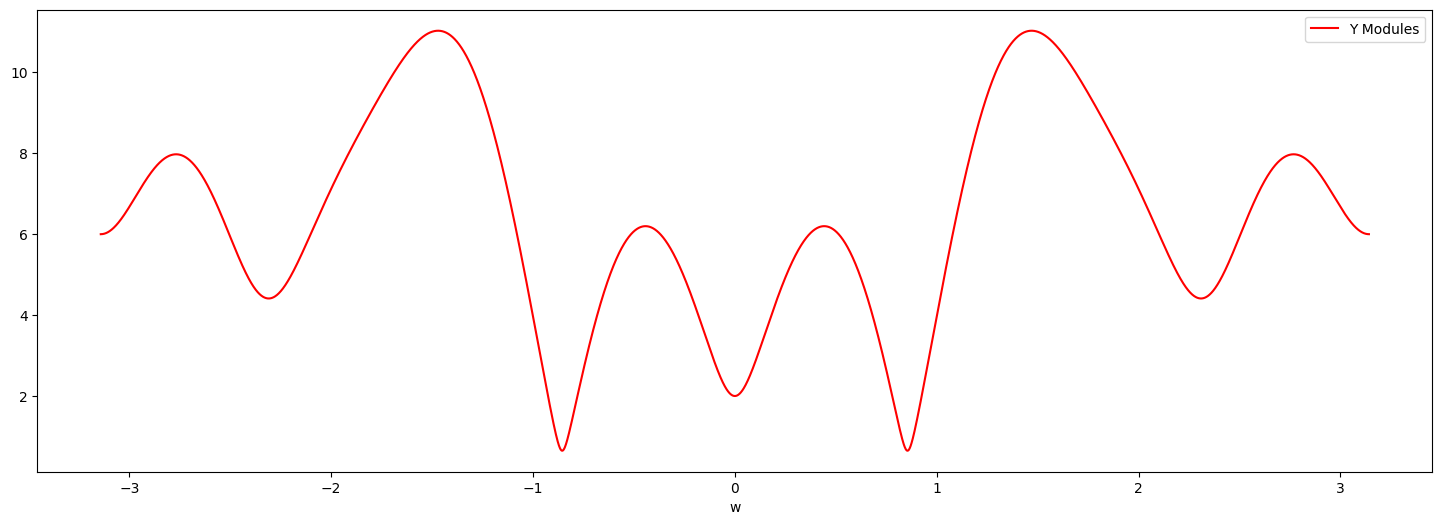

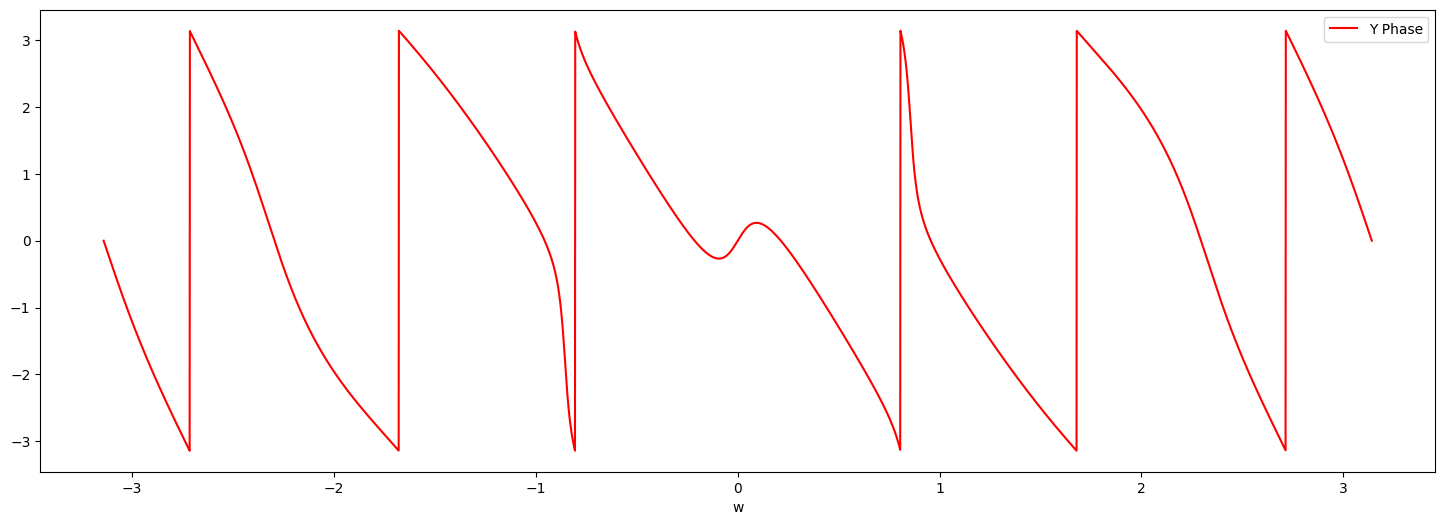

In [30]:
NUM_W = 5000


def DTFT(nT, xn, w):
    Xw = np.zeros(len(w), dtype=complex)
    for i, wi in enumerate(w):
        # Only at t = nT[i], there is xn[i] * delta
        Xw[i] = np.sum(xn * np.exp(-1j * wi * nT))
    return Xw


def dtft_of_func_nyquist(x_values, y_values, time_interval):
    # The period (Nyquist interval) is ws (the sampling frequency)
    # s and t in the time domain
    sampling_angular_frequency = 2 * np.pi / time_interval
    w_vec = np.linspace(-sampling_angular_frequency / 2, +
                        sampling_angular_frequency / 2, NUM_W)
    return w_vec, DTFT(x_values, y_values, w_vec)


def dtft_of_func_positive_nyquist(x_values, y_values, time_interval):
    # The period (Nyquist interval) is ws (the sampling frequency)
    # s and t in the time domain
    sampling_angular_frequency = 2 * np.pi / time_interval
    w_vec = np.linspace(0, +sampling_angular_frequency, NUM_W)
    return w_vec, DTFT(x_values, y_values, w_vec)


def get_mod_pha_real_imag(c):
    return np.abs(c), np.angle(c), c.real, c.imag


w_vec, dtft = dtft_of_func_nyquist(ns, y, 1)
dtft_plots = get_mod_pha_real_imag(dtft)
prop_desc = ['Modulus', 'Phase']


def plot_mod_phase(x_vec, y_vec, x_name, y_name):
    plots = get_mod_pha_real_imag(y_vec)
    for part in range(2):
        fig = plt.figure(figsize=(18, 6))
        plt.plot(x_vec, plots[part], 'r-', label=f'{y_name} {prop_desc[part]}')
        plt.legend()
        plt.xlabel(x_name)
        fig.show()


plot_mod_phase(w_vec, dtft, 'w', 'Y')

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_17487/1686966060.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


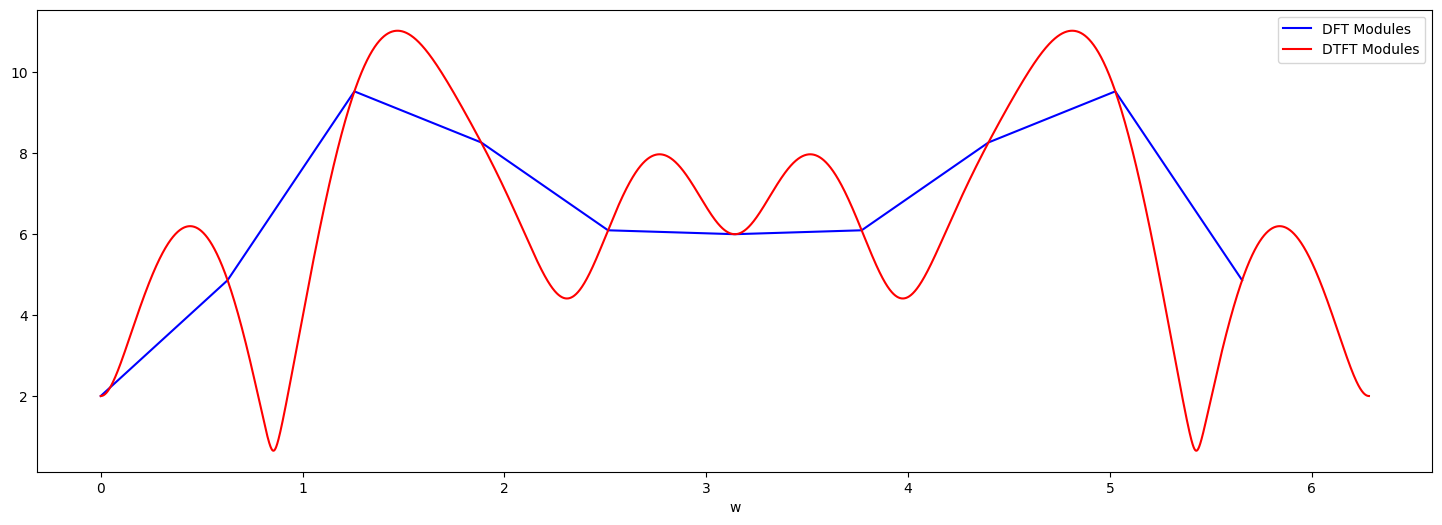

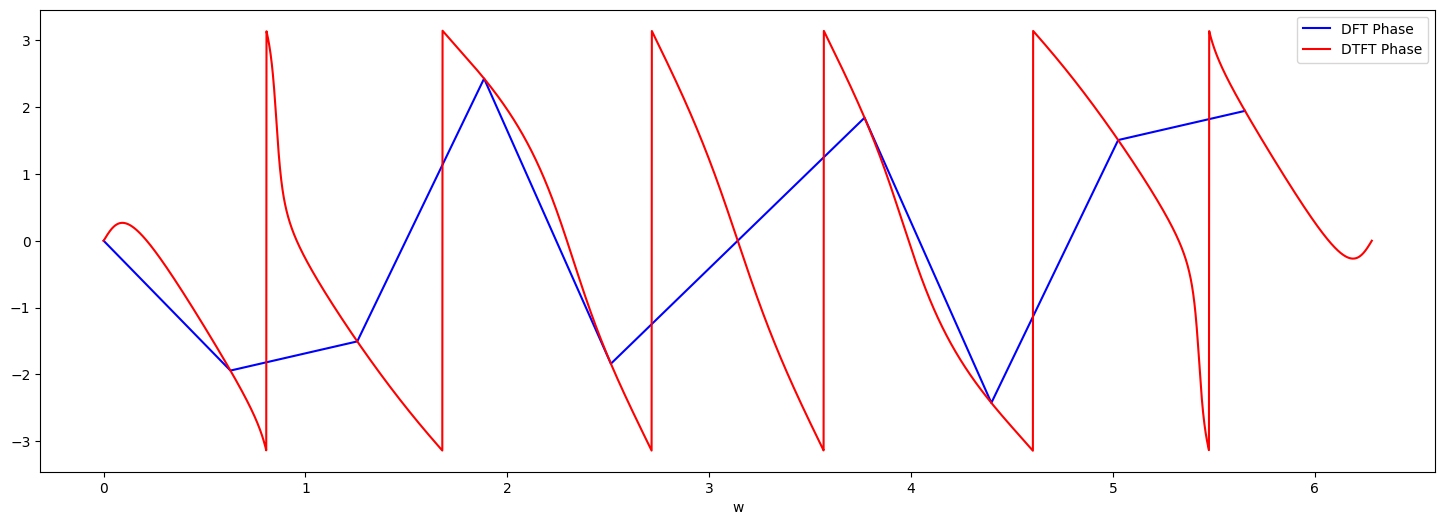

In [31]:
def dft(ys):
    n = len(ys)
    ns = np.arange(n)

    def omega_k(k):
        return 2 * np.pi * k / n
    w_vec = np.array([omega_k(k) for k in range(n)])
    dft_vec = np.array([sum(ys * np.exp(-1j * w * ns)) for w in w_vec])
    return w_vec, dft_vec


dft_w_vec, dft_vec = dft(y)
dtft_w_vec, dtft_vec = dtft_of_func_positive_nyquist(ns, y, 1)

for part in range(2):
    fig = plt.figure(figsize=(18, 6))
    dft_plots = get_mod_pha_real_imag(dft_vec)
    dtft_plots = get_mod_pha_real_imag(dtft_vec)
    plt.plot(dft_w_vec, dft_plots[part], 'b-', label=f'DFT {prop_desc[part]}')
    plt.plot(dtft_w_vec, dtft_plots[part], 'r-',
             label=f'DTFT {prop_desc[part]}')
    plt.legend()
    plt.xlabel('w')
    fig.show()

/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_17487/2618790575.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


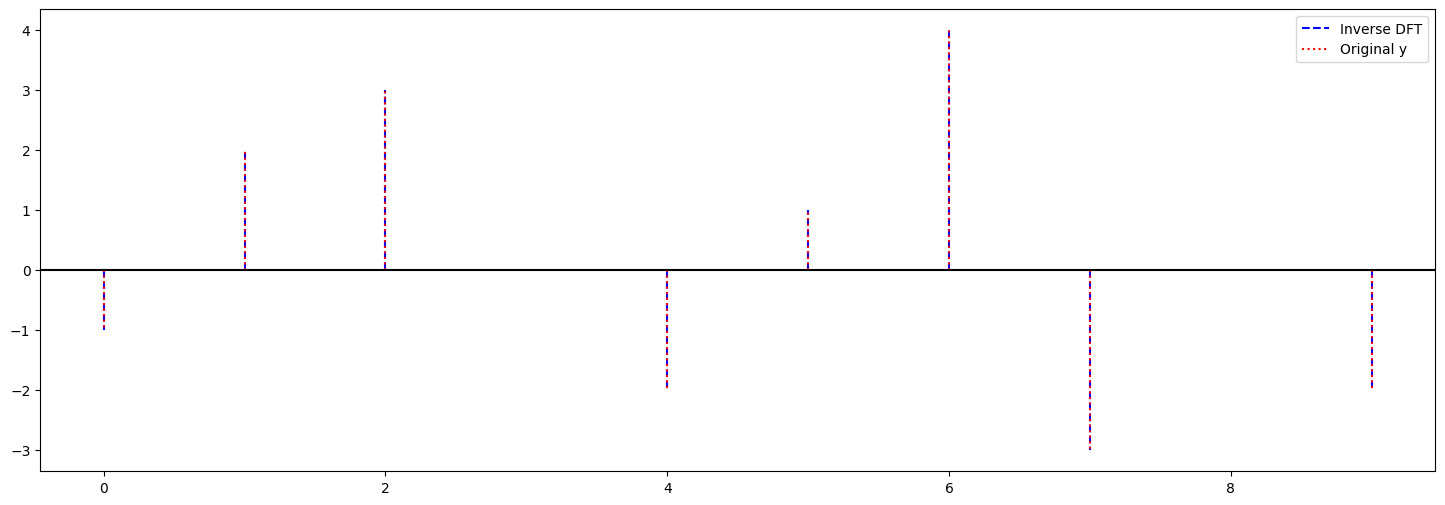

In [32]:
def inverse_dtft(maxn, t_sample, dtft_w_vec, dtft_x_vec):
    # w_vec and x_vec should be in one Nyquist interval, from -ws / 2 to +ws / 2
    ns = np.arange(-maxn, maxn + 1)
    ts = ns * t_sample
    xs = np.zeros_like(ts, dtype=complex)
    dw = dtft_w_vec[1] - dtft_w_vec[0]
    w_sample = 2 * np.pi / t_sample
    for i in range(len(ts)):
        nT = ts[i]
        xs[i] = sum(dtft_x_vec * np.exp(1j * nT * dtft_w_vec) * dw) / w_sample
    return ts, xs


def inverse_dft(dft_vec):
    n = len(dft_vec)
    ns = np.arange(n)
    w_vec = np.array([2 * np.pi * k / n for k in range(n)])
    y_vec = np.array([sum(dft_vec * np.exp(1j * w * ns)) / n for w in w_vec])
    return ns, y_vec


# plot y and its inverse DFT in one figure
fig = plt.figure(figsize=(18, 6))
_, idft_y = inverse_dft(dft_vec)
plt.vlines(ns, ymin=0, ymax=idft_y, colors='b',
           linestyles='dashed', label='Inverse DFT')
plt.vlines(ns, ymin=0, ymax=y, colors='r',
           linestyles='dotted', label='Original y')
plt.legend()
plt.axhline(y=0, color='k')
fig.show()

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_17487/3861707446.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


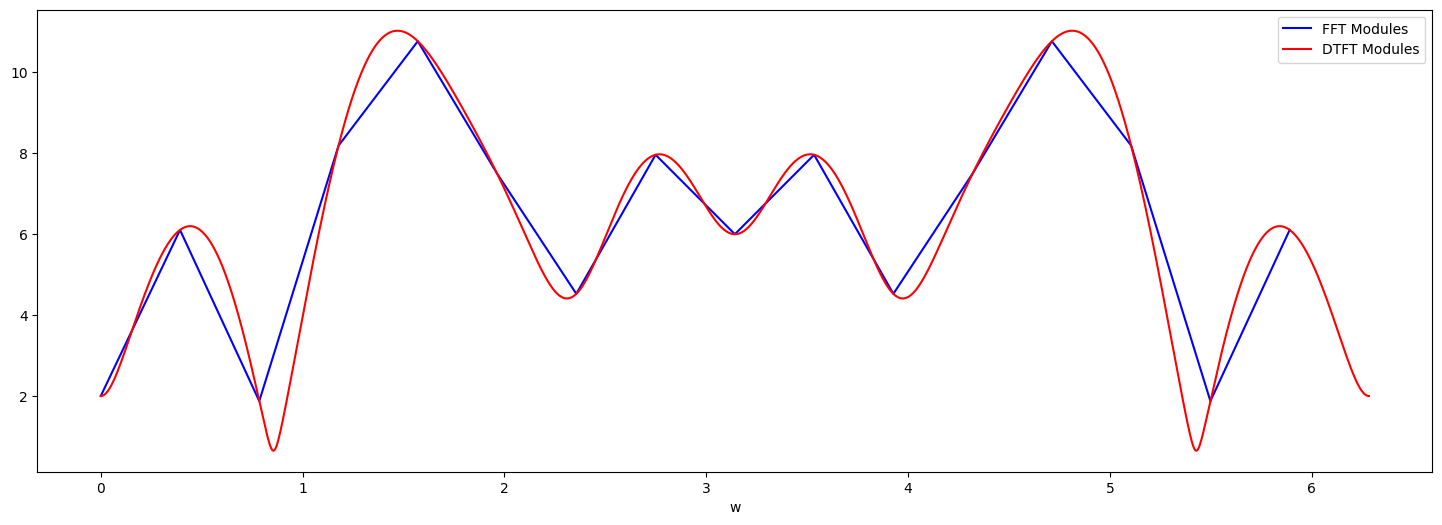

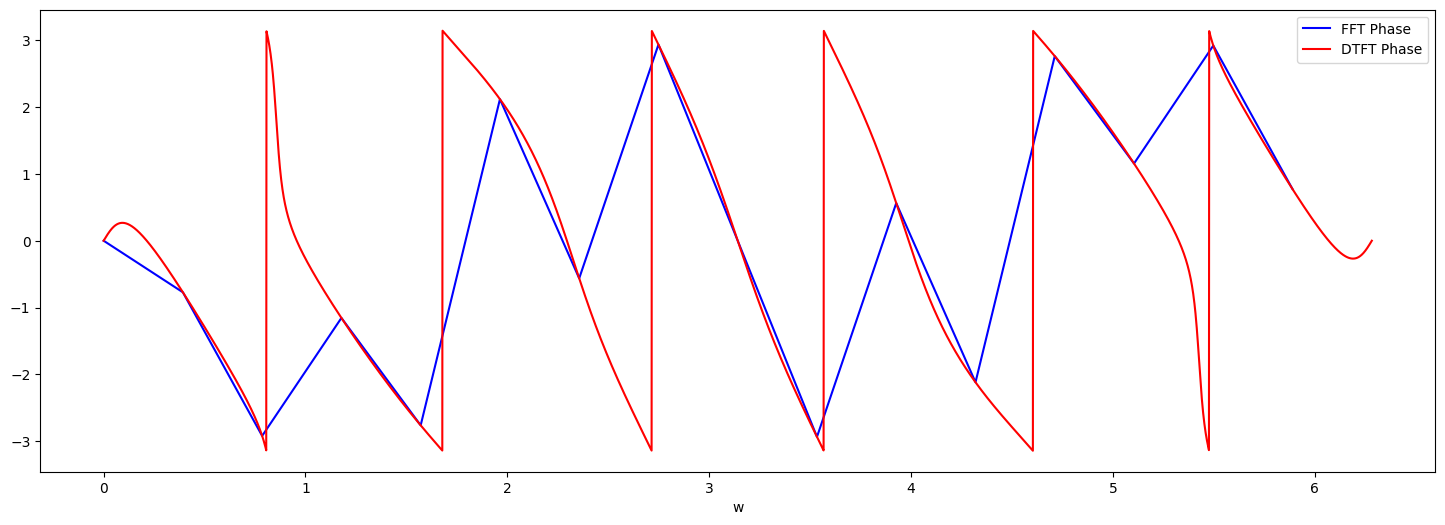

In [38]:
pad_x = np.arange(16)
pad_w = np.array([2 * np.pi * k / 16 for k in range(16)])
pad_y = np.pad(y, (0, 16 - len(y)), 'constant', constant_values=(0,))
fft = np.fft.fft(pad_y)

for part in range(2):
    fig = plt.figure(figsize=(18, 6))
    fft_plots = get_mod_pha_real_imag(fft)
    dtft_plots = get_mod_pha_real_imag(dtft_vec)
    plt.plot(pad_w, fft_plots[part], 'b-', label=f'FFT {prop_desc[part]}')
    plt.plot(dtft_w_vec, dtft_plots[part], 'r-',
             label=f'DTFT {prop_desc[part]}')
    plt.legend()
    plt.xlabel('w')
    fig.show()

In [51]:
import numpy as np
import time
L_values = np.arange(1000, 10001, 1000)
log_l = np.log10(L_values)
dft_times = []
fft_times = []

for L in L_values:
    y_padded = np.pad(y, (0, L - len(y)), 'constant', constant_values=(0,))

    # Measure the time for DFT
    start_time = time.time()
    dft(y_padded)
    dft_time = time.time() - start_time
    dft_times.append(dft_time)

    # Measure the time for FFT
    start_time = time.time()
    np.fft.fft(y_padded)
    fft_time = time.time() - start_time
    fft_times.append(fft_time)

print(fft_times, dft_times)

[0.00013113021850585938, 4.7206878662109375e-05, 5.4836273193359375e-05, 6.198883056640625e-05, 7.915496826171875e-05, 0.0002219676971435547, 0.00014901161193847656, 0.00019288063049316406, 0.00026607513427734375, 0.00024509429931640625] [0.1345820426940918, 0.4387180805206299, 0.9614450931549072, 1.6871941089630127, 2.8740580081939697, 3.8977012634277344, 5.280043125152588, 6.915188789367676, 9.13497018814087, 11.151033639907837]


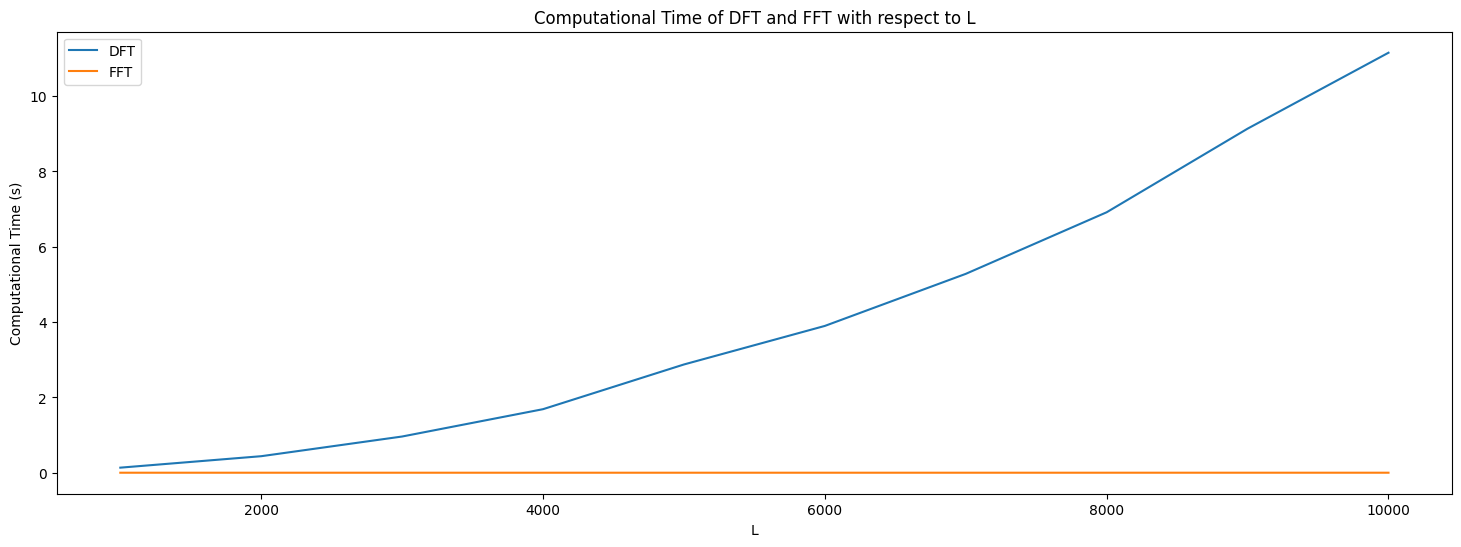

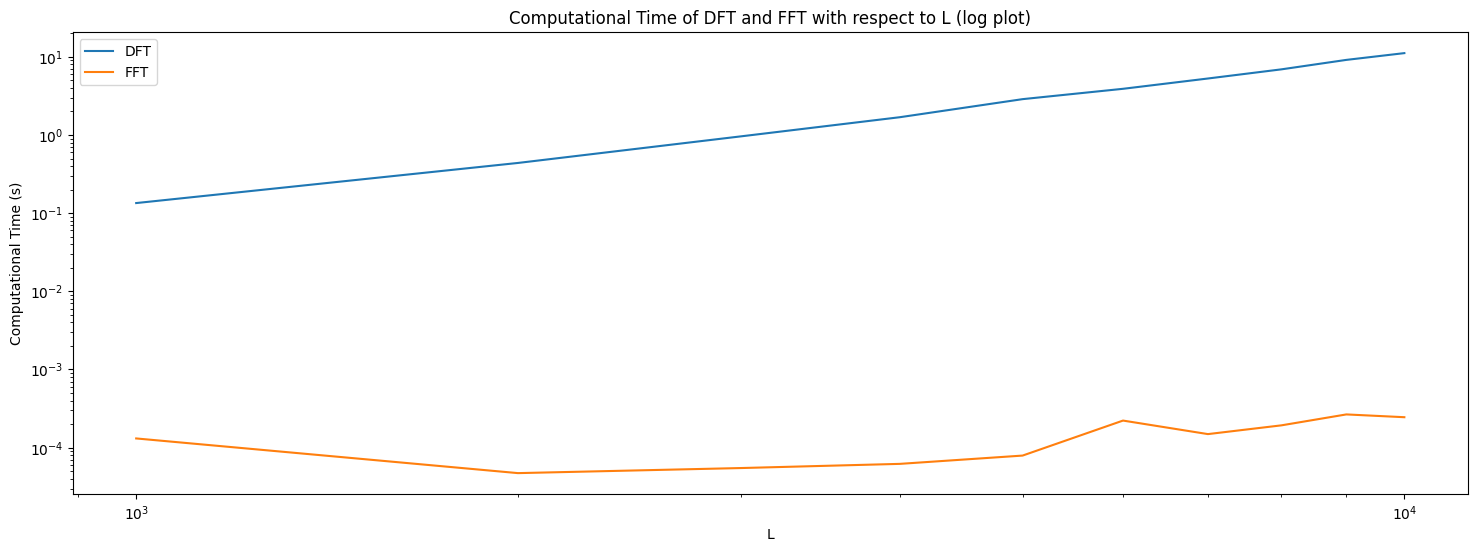

In [58]:

# Plot the computational time curve
plt.figure(figsize=(18, 6))
plt.plot(L_values, dft_times, label='DFT')
plt.plot(L_values, fft_times, label='FFT')
plt.xlabel('L')
plt.ylabel('Computational Time (s)')
plt.title('Computational Time of DFT and FFT with respect to L')
plt.legend()
plt.show()


plt.figure(figsize=(18, 6))
plt.loglog(L_values, dft_times, label='DFT')
plt.loglog(L_values, fft_times, label='FFT')
plt.xlabel('L')
plt.ylabel('Computational Time (s)')
plt.title('Computational Time of DFT and FFT with respect to L (log plot)')
plt.legend()
plt.show()